名称：ScHamThPDE?薛方亥方热方/ThreePDEs
numpy或其他模块有无直接归一化向量的函数，目前采用自编函数normunify进行归一化
归一化是否需要乘以deltax？

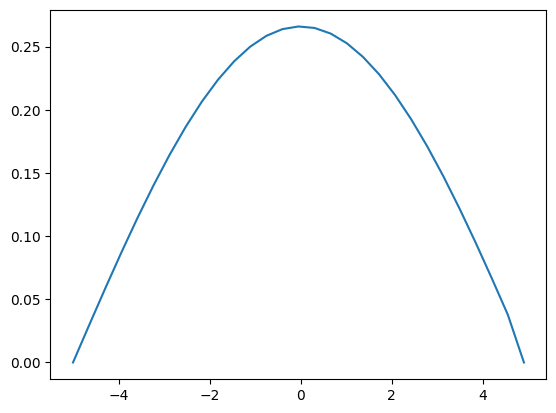

In [16]:
from cmath import pi
import numpy as np
import sys
from cmath import e,pi,sin
def eigfun(x,n,a):
    '''无限深方势阱本征波函数'''
    '''a为势阱宽度,势阱中心在原点'''
    psin=(2/a)**0.5*np.sin(n*np.pi/a*(x+a/2))
    return psin
def beta0(x,t):
    '''在薛定谔方程中充当势能函数'''
    V=0#无限深方势阱
    return V
def Boundary(t):
    '''边界条件函数'''
    f=0#x0=处
    g=0#x=xN处
    return f,g
def Initial(x):
    '''初始条件函数'''
    v=eigfun(x,1,10)#t=0处
    w=v#t=1处
    return v,w
def normunify(u):
    '''归一化函数'''
    '''对已取模长的波函数进行归一化,只适用于波函数'''
    row,col=np.shape(u)
    for i in range(col):
        sumi=np.linalg.norm(u[:,i])
        for j in range(row):
            u[j,i]=u[j,i]/sumi
    return u
#设置系统参数
hbar,m,w=1,1,1#系统参数
alpha0,gamma0=-hbar**2/(2*m),hbar
# alpha0,beta0,gamma0=1,1,1
#确定时空步长
t0,tN,deltat=0,40,0.1
x0,xN,deltax=-5,5,0.1
tlist=np.arange(t0,tN,deltat)
xlist=np.arange(x0,xN,deltax)
tmat,xmat=np.meshgrid(tlist,xlist)
result=beta0(xmat,tmat)
beta0bar=np.average(result)
deltat=np.abs(gamma0/2/(beta0bar-2))
deltax=np.sqrt(np.abs(deltat*alpha0/gamma0))
tlist=np.arange(t0,tN,deltat)
xlist=np.arange(x0,xN,deltax)
Nt,Nx=len(tlist),len(xlist)

#差分方程中的参数
alpha=alpha0/deltax**2
gamma=gamma0/(2*deltat)
#创建u矩阵并设置边界条件与初始条件
u=np.zeros((Nx,Nt),dtype=complex)#Psi是Nx行Nt+1列的复数矩阵
u[:,0],u[:,1]=Initial(xlist)#初始条件
u[0,:],u[Nx-1,:]=Boundary(tlist)#边界条件

#填充u矩阵的其他元素
for i in range(1,Nx-1):
    x=xlist[i]
    for n in range(1,Nt-1):
        t=tlist[n]
        u[i,n+1]=(alpha*u[i+1,n]+(beta0(x,t)-2*alpha)*u[i,n]+alpha*u[i-1,n]+gamma*u[i,n-1])/gamma
unorm=abs(u)#取模长
P=normunify(unorm)#归一化

#作图
import matplotlib.pyplot as plt
plt.plot(xlist,P[:,0])
plt.show()

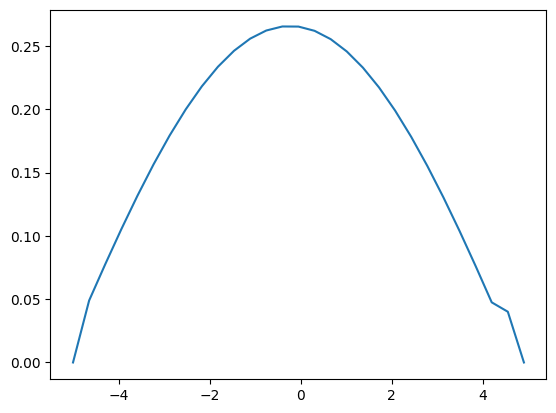

In [25]:
plt.plot(xlist,P[:,3])
plt.show()

In [20]:
len(tlist)


160

1.5